#Model 1


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

train_df = pd.read_csv('/content/drive/MyDrive/mitbih_train.csv',header=None)
test_df = pd.read_csv('/content/drive/MyDrive/mitbih_test.csv',header=None)

Mounted at /content/drive


In [3]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


1 model


In [5]:
!pip install PyWavelets

In [6]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA, FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pywt


In [7]:
train_df[187] = train_df[187].astype(int)
equilibre=train_df[187].value_counts()
print(equilibre)

187
0    72471
4     6431
2     5788
1     2223
3      641
Name: count, dtype: int64


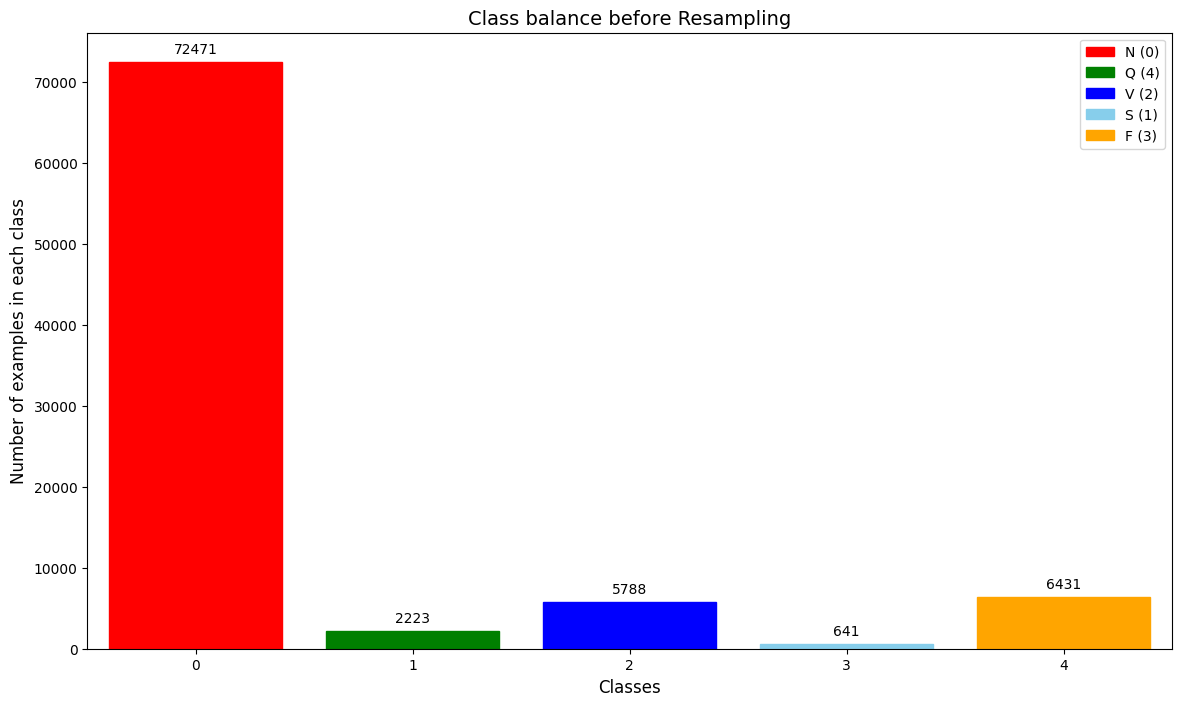

In [8]:
def plot_class_balance(train_df, title):
    train_df[187] = train_df[187].astype(int)
    class_count = train_df[187].value_counts()

    # Define the colors and labels for each class
    colors = ['red', 'green', 'blue', 'skyblue', 'orange']
    labels = ['N (0)', 'Q (4)', 'V (2)', 'S (1)', 'F (3)']

    # Create the bar plot
    fig, ax = plt.subplots(figsize=(14, 8))
    bars = sns.barplot(x=class_count.index, y=class_count.values)

    # Color each bar based on its class
    for i, bar in enumerate(bars.patches):
        bar.set_color(colors[i % len(colors)])

    # Annotate each bar with its count
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points')

    # Add legend, labels, and title
    handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
    plt.legend(handles, labels)
    plt.xlabel("Classes", fontsize=12)
    plt.ylabel("Number of examples in each class", fontsize=12)
    plt.title(title, fontsize=14)

    # Show the plot
    plt.show()

plot_class_balance(train_df, "Class balance before Resampling")


In [9]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [10]:
equilibre=train_df[187].value_counts()
print(equilibre)


187
0    20000
1    20000
2    20000
3    20000
4    20000
Name: count, dtype: int64


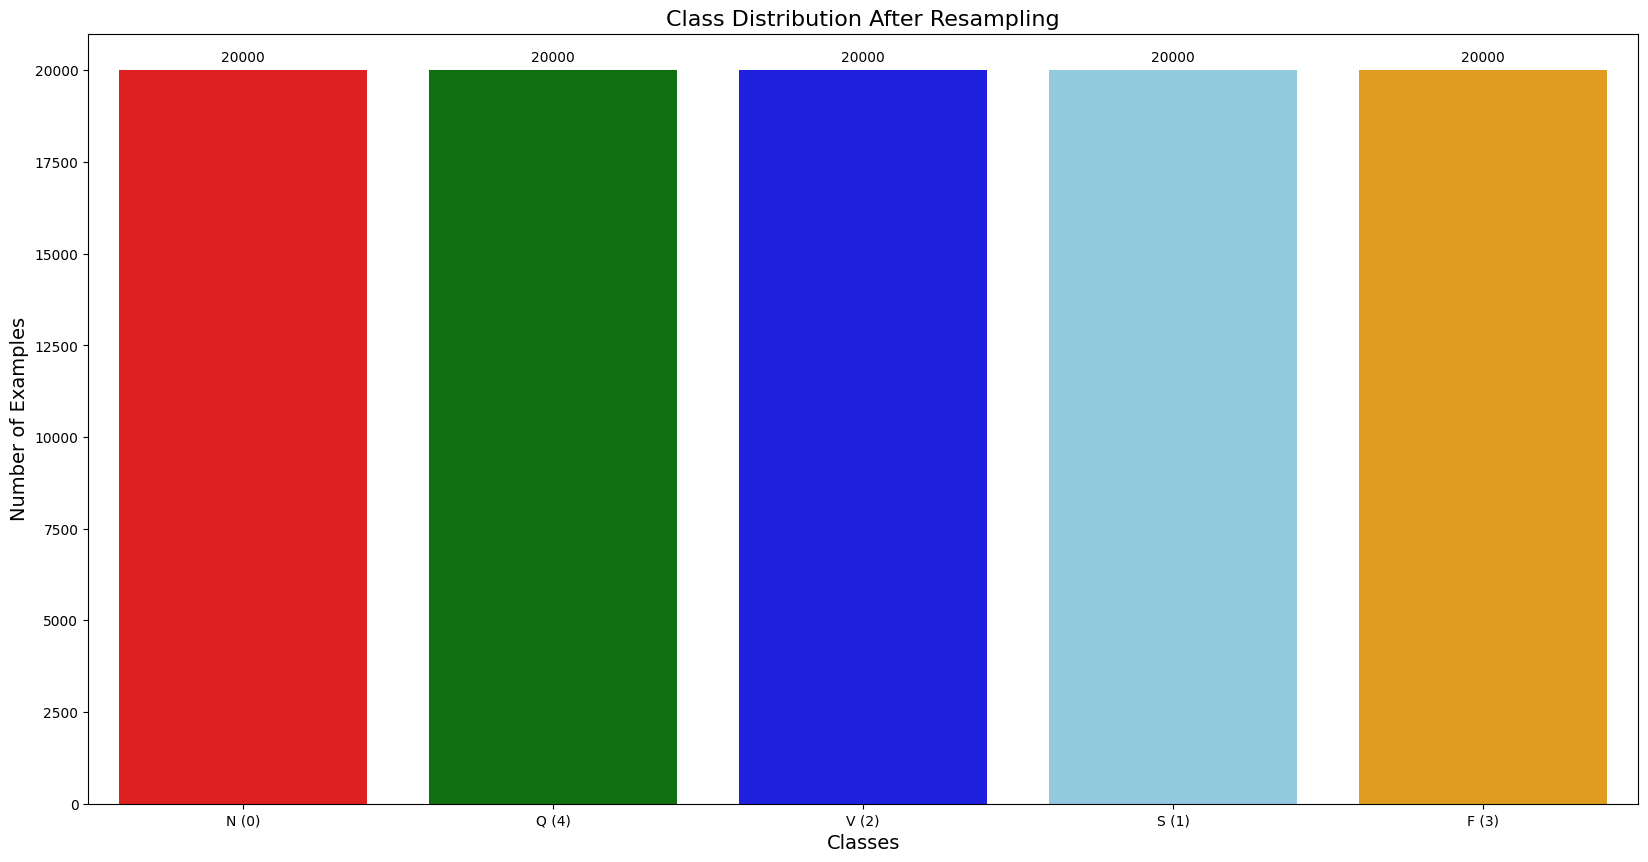

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'equilibre' contains the value counts for each class
class_counts = equilibre

# Set up the colors for different classes
colors = ['red', 'green', 'blue', 'skyblue', 'orange']
labels = ['N (0)', 'Q (4)', 'V (2)', 'S (1)', 'F (3)']

# Create the bar plot
plt.figure(figsize=(20, 10))
sns.barplot(x=labels, y=class_counts, palette=colors)

# Annotate each bar with its count
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 9),
                       textcoords='offset points')

# Set labels and title
plt.xlabel("Classes", fontsize=14)
plt.ylabel("Number of Examples", fontsize=14)
plt.title("Class Distribution After Resampling", fontsize=16)

# Show the plot
plt.show()



In [12]:
print("Statistical Data:")
print(train_df.describe())

# Calculate mean, median, and standard deviation
mean_values = train_df.mean()
median_values = train_df.median()
std_dev_values = train_df.std()

# Display mean, median, and standard deviation
print("\nMean Values:")
print(mean_values)

print("\nMedian Values:")
print(median_values)

print("\nStandard Deviation Values:")
print(std_dev_values)

Statistical Data:
                 0              1              2              3    \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.840585       0.736421       0.481091       0.313701   
std         0.280970       0.263010       0.251976       0.252200   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.827368       0.617081       0.281579       0.101449   
50%         0.972452       0.831761       0.486009       0.269704   
75%         1.000000       0.923858       0.656954       0.472222   
max         1.000000       1.000000       1.000000       1.000000   

                 4              5              6              7    \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.273039       0.265182       0.249509       0.236397   
std         0.225966       0.208125       0.203007       0.190732   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.1

In [13]:
# Selecting a single point from each class for visualization
c = train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))
c.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
33908,0.978417,0.926259,0.602518,0.451439,0.388489,0.366906,0.307554,0.271583,0.232014,0.190647,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0
74557,0.560669,0.493724,0.426778,0.397490,0.430962,0.460251,0.472803,0.372385,0.213389,0.121339,...,0.129707,0.138075,0.16318,0.209205,0.32636,0.552301,0.790795,1.0,0.903766,1
79292,1.000000,0.976250,0.741250,0.445000,0.381250,0.326250,0.290000,0.286250,0.275000,0.266250,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,2
80506,1.000000,0.743741,0.378498,0.085420,0.008837,0.100147,0.119293,0.088365,0.075110,0.069219,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,3
84984,1.000000,0.554007,0.627178,0.620209,0.588850,0.602787,0.540070,0.393728,0.261324,0.055749,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,4


Text(0.5, 1.0, 'Paced')

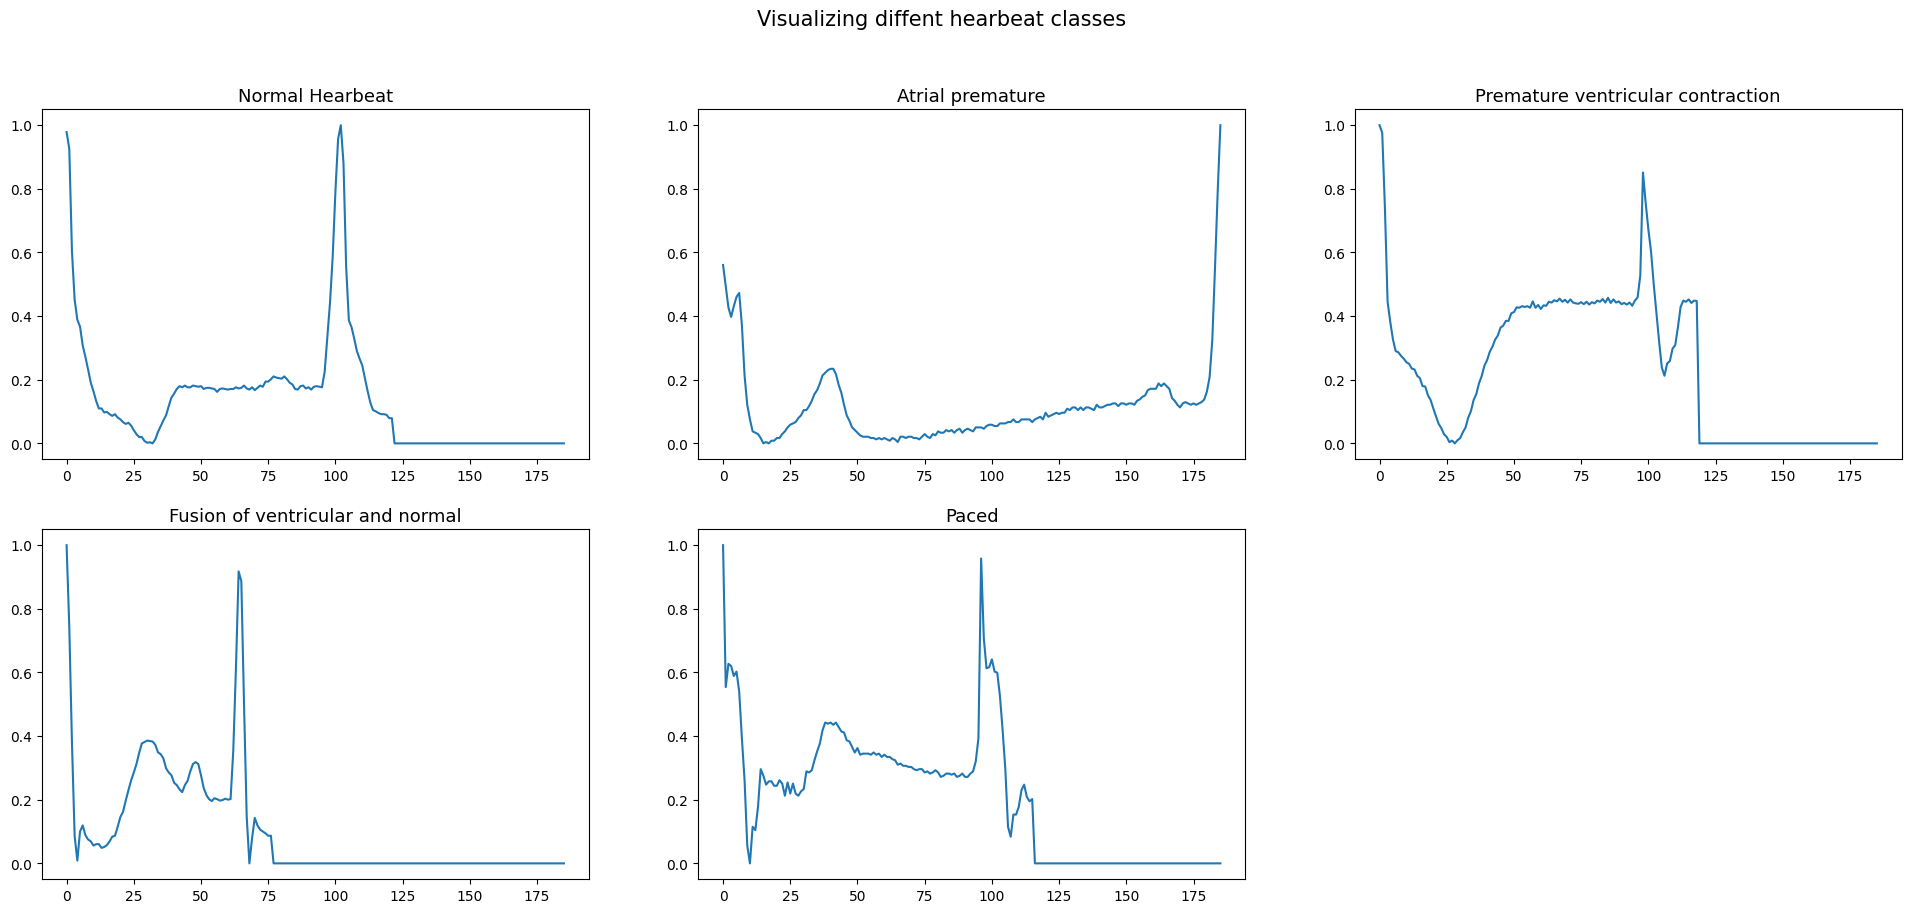

In [14]:
plt.figure(figsize=(24,10))
plt.suptitle("Visualizing diffent hearbeat classes", fontsize=15)

ax1 = plt.subplot2grid((2, 3), (0, 0))
ax2 = plt.subplot2grid((2, 3), (0, 1))
ax3 = plt.subplot2grid((2, 3), (0, 2))
ax4 = plt.subplot2grid((2, 3), (1, 0))
ax5 = plt.subplot2grid((2, 3), (1, 1))


ax1.plot(c.iloc[0,:186])
ax1.set_title("Normal Hearbeat", fontsize=13)
ax2.plot(c.iloc[1,:186])
ax2.set_title("Atrial premature", fontsize=13)
ax3.plot(c.iloc[2,:186])
ax3.set_title("Premature ventricular contraction", fontsize=13)
ax4.plot(c.iloc[3,:186])
ax4.set_title("Fusion of ventricular and normal", fontsize=13)
ax5.plot(c.iloc[4,:186])
ax5.set_title("Paced", fontsize=13)

In [15]:
X_train = train_df.iloc[:, 0:187].values
y_train = train_df.iloc[:, 187].values
X_test = test_df.iloc[:, 0:187].values
y_test = test_df.iloc[:, 187].values

#Features


#Model 2 (Cumulant, PCA and CNN usage)

In [27]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix



In [28]:
def apply_fft(data):
    # Apply FFT and take the magnitude of the complex numbers returned
    fft_features = np.abs(np.fft.fft(data))
    # Only keep the first half of the features as FFT output is symmetric
    fft_features = fft_features[:, :data.shape[1] // 2]
    return fft_features

# Extract FFT features
X_train_fft = apply_fft(train_df.iloc[:, :-1].values)
X_test_fft = apply_fft(test_df.iloc[:, :-1].values)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_fft)
X_test_scaled = scaler.transform(X_test_fft)

# Labels
y_train = train_df.iloc[:, -1].values
y_test = test_df.iloc[:, -1].values

# Convert labels to one-hot encoding
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Reshape data for 1D convolution
n_features = X_train_scaled.shape[1]  # Number of features for each sample
X_train_img = X_train_scaled.reshape(-1, n_features, 1)
X_test_img = X_test_scaled.reshape(-1, n_features, 1)

In [29]:
# 1D CNN model
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(n_features, 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.25),
    Conv1D(128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Conv1D(256, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.35),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(y_train_cat.shape[1], activation='softmax')
])

In [30]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_img, y_train_cat, epochs=10, batch_size=32, validation_data=(X_test_img, y_test_cat))


Epoch 1/10
3125/3125 [==============================] - 174s 54ms/step - loss: 0.4646 - accuracy: 0.8402 - val_loss: 0.4146 - val_accuracy: 0.8449
Epoch 2/10
3125/3125 [==============================] - 149s 48ms/step - loss: 0.2797 - accuracy: 0.9000 - val_loss: 0.3154 - val_accuracy: 0.8868
Epoch 3/10
3125/3125 [==============================] - 167s 54ms/step - loss: 0.2191 - accuracy: 0.9226 - val_loss: 0.3519 - val_accuracy: 0.8837
Epoch 4/10
3125/3125 [==============================] - 151s 48ms/step - loss: 0.1857 - accuracy: 0.9348 - val_loss: 0.2169 - val_accuracy: 0.9302
Epoch 5/10
3125/3125 [==============================] - 149s 48ms/step - loss: 0.1640 - accuracy: 0.9430 - val_loss: 0.2299 - val_accuracy: 0.9259
Epoch 6/10
3125/3125 [==============================] - 150s 48ms/step - loss: 0.1469 - accuracy: 0.9492 - val_loss: 0.2519 - val_accuracy: 0.9244
Epoch 7/10
3125/3125 [==============================] - 146s 47ms/step - loss: 0.1349 - accuracy: 0.9539 - val_loss: 0

In [31]:
test_loss, test_accuracy = model.evaluate(X_test_img, y_test_cat, verbose=1)
print(f"Test accuracy: {test_accuracy*100:.2f}%")


685/685 [==============================] - 8s 12ms/step - loss: 0.1784 - accuracy: 0.9482
Test accuracy: 94.82%


In [32]:
# Prediction and classification report
y_pred_probs = model.predict(X_test_img)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)
print(classification_report(y_true, y_pred))

685/685 [==============================] - 7s 10ms/step
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     18118
           1       0.51      0.83      0.63       556
           2       0.81      0.94      0.87      1448
           3       0.47      0.84      0.60       162
           4       0.95      0.98      0.96      1608

    accuracy                           0.95     21892
   macro avg       0.75      0.91      0.81     21892
weighted avg       0.96      0.95      0.95     21892



Confusion matrix, without normalization
Normalized confusion matrix


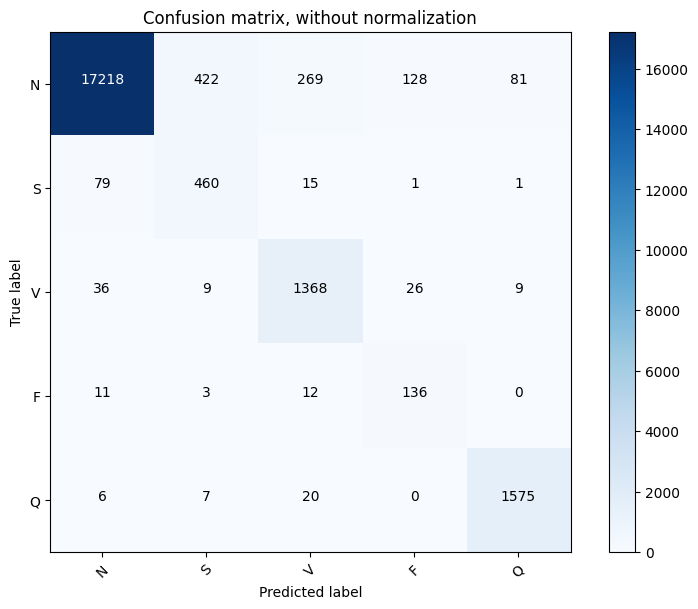

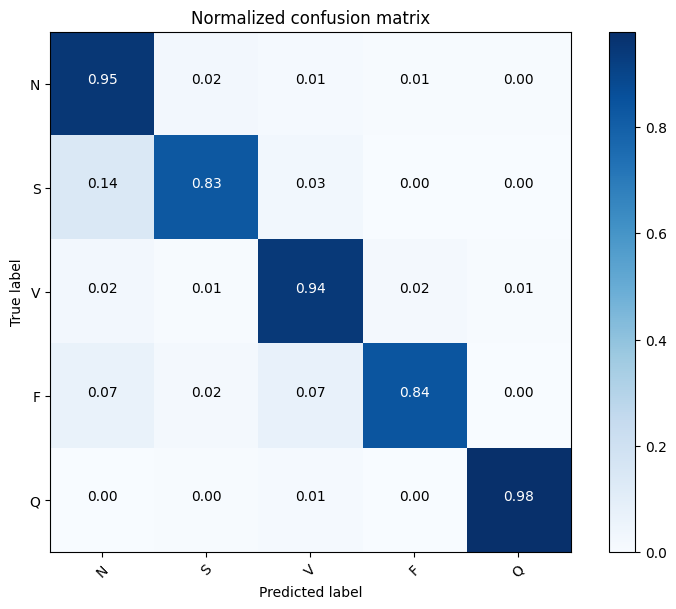

In [36]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`."""
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


cnf_matrix = confusion_matrix(y_true, y_pred)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'], title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'], normalize=True, title='Normalized confusion matrix')

plt.show()